In [5]:
%matplotlib inline
import pandas as pd
import datetime
import dataset

In [7]:
node_id = '001e06113cff'

end = datetime.date.today() + datetime.timedelta(days=2)
start = end - datetime.timedelta(days=7)
dates = [start + datetime.timedelta(days=i) for i in range((end - start).days)]

urlfmt = 'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/{node_id}/{date}.csv.gz'
urls = [urlfmt.format(node_id=node_id, date=date) for date in dates]
df = dataset.read_datasets(urls)

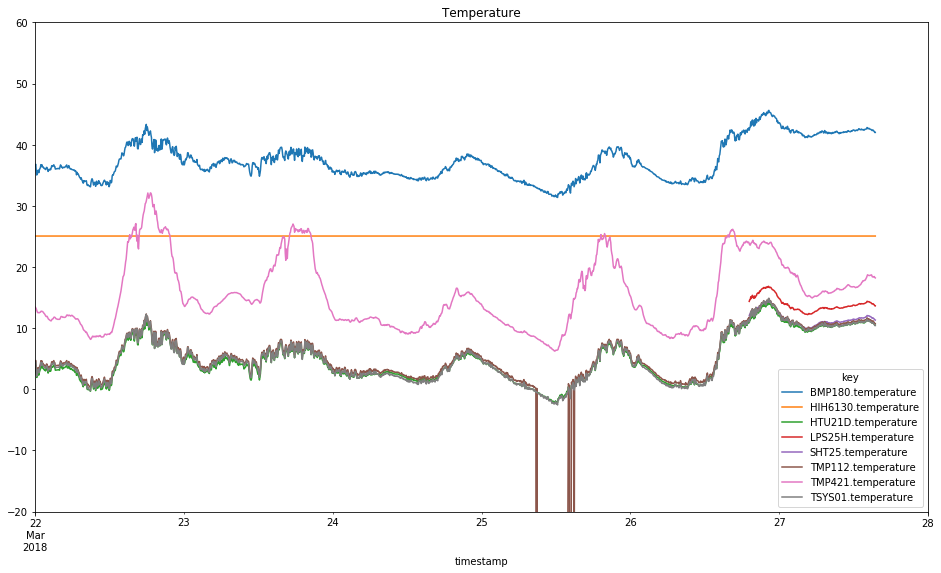

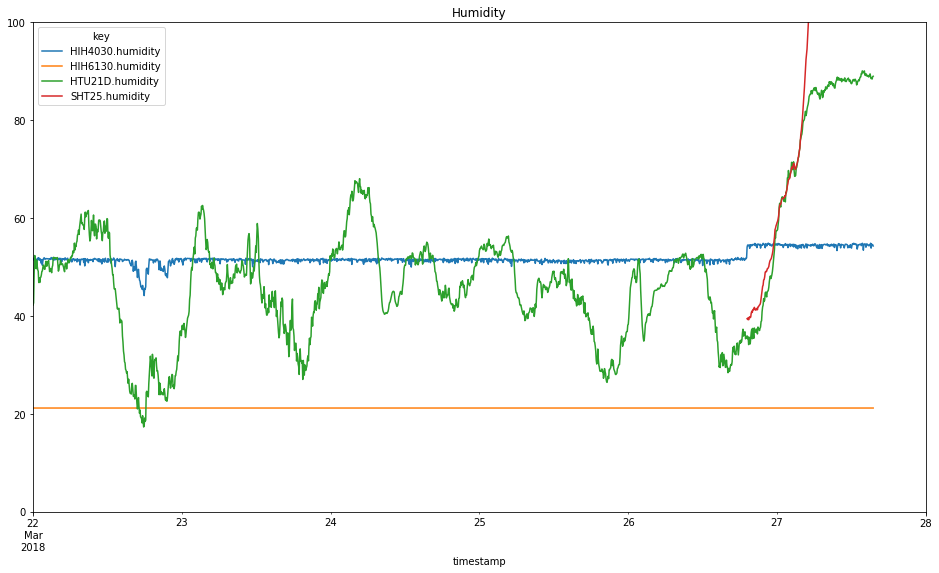

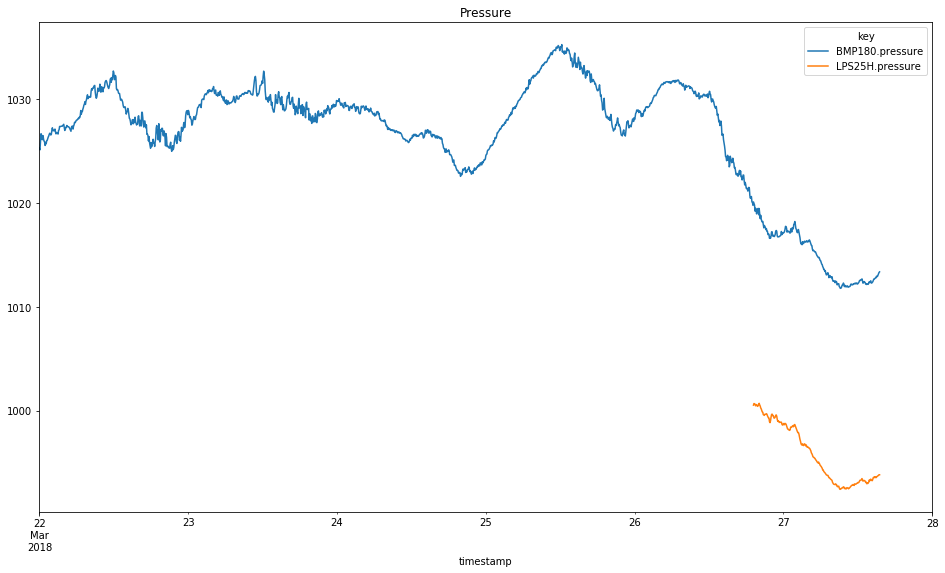

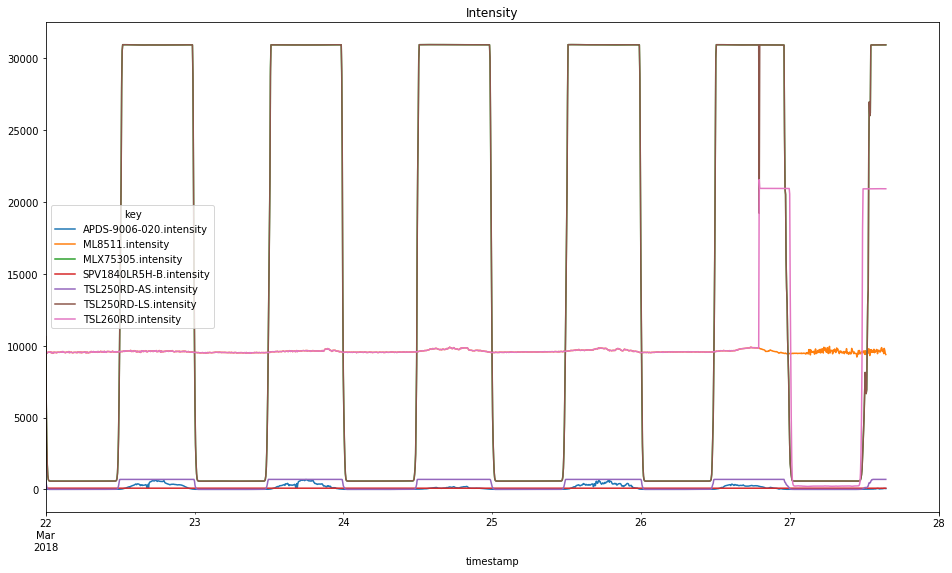

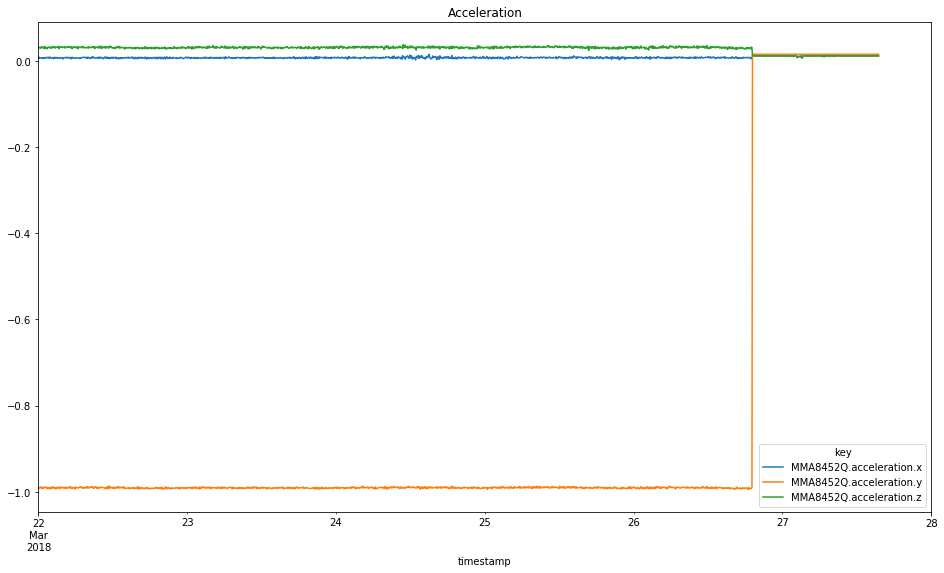

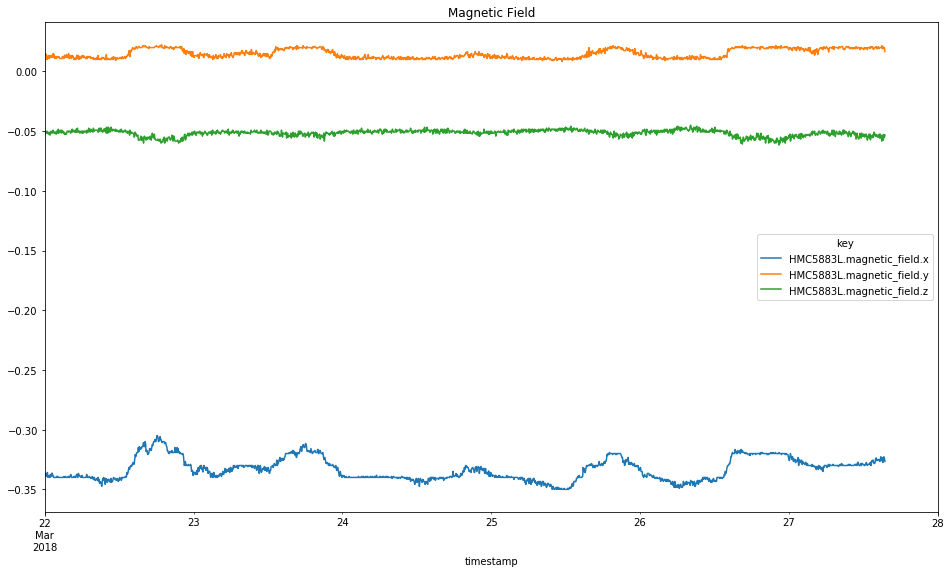

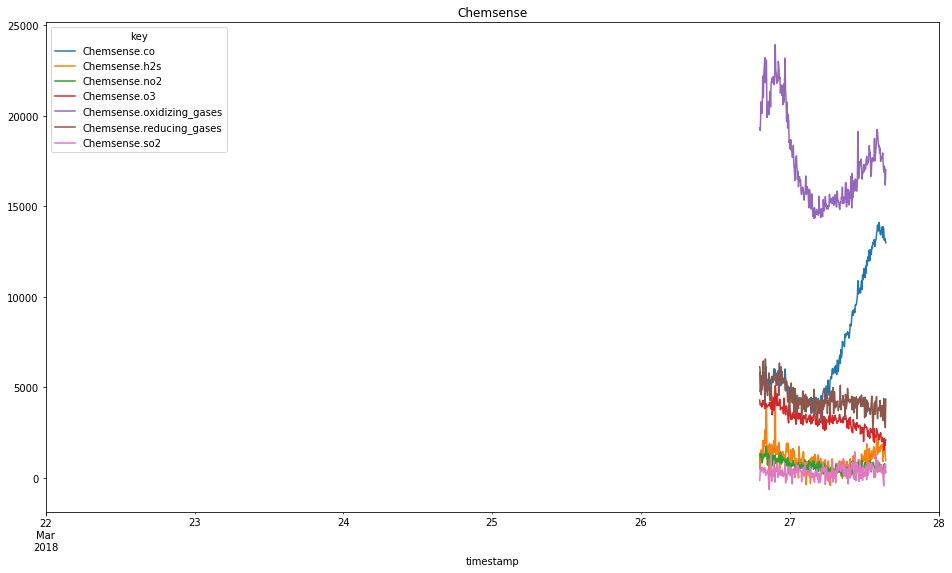

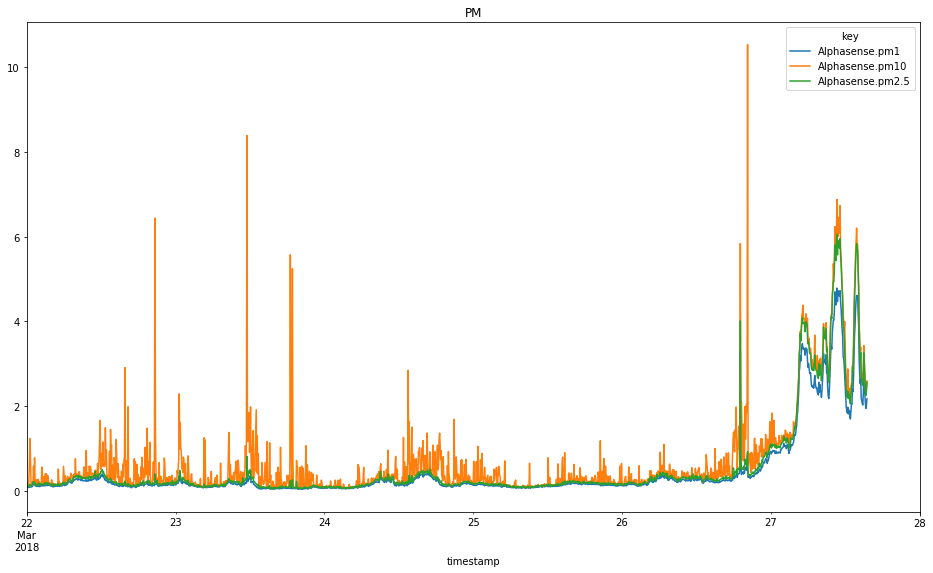

In [8]:
plots = {
    'Temperature': {
        'filter': lambda c: ('temperature' in c and 'PR' not in c and 'adc_' not in c),
        'limits': (-20.0, 60.0),
    },
    'Humidity': {
        'filter': lambda c: 'humidity' in c,
        'limits': (0.0, 100.0),
    },
    'Pressure': {
        'filter': lambda c: 'pressure' in c,
    },
    'Intensity': {
        'filter': lambda c: 'intensity' in c,
    },
    'Acceleration': {
        'filter': lambda c: 'MMA8452Q' in c,
    },
    'Magnetic Field': {
        'filter': lambda c: 'HMC5883L' in c,
    },
    'ADC Temperature': {
        'filter': lambda c: 'adc_temperature' in c,
    },
    'Chemsense': {
        'filter': lambda c: 'Chemsense' in c and 'mac_address' not in c and 'at' not in c,
    },
    'PM': {
        'filter': lambda c: '.pm' in c,
    },
}

def show_plots(df):
    figsize = (16, 9)
    xlim = (min(dates), max(dates))
    
    for title, options in plots.items():
        columns = list(filter(options['filter'], df.columns))

        if len(columns) == 0:
            continue

        df[columns].plot(figsize=figsize, title=title, xlim=xlim, ylim=options.get('limits', None))

show_plots(df.resample('5Min').mean())

In [9]:
df.head()

key,APDS-9006-020.intensity,Alphasense.bins,Alphasense.fw,Alphasense.id,Alphasense.pm1,Alphasense.pm10,Alphasense.pm2.5,Alphasense.sample flow rate,Alphasense.sampling period,BMP180.pressure,...,SPV1840LR5H-B.intensity,Si1145.ir_count,Si1145.uv_count,Si1145.visible_light_count,TMP112.temperature,TMP421.temperature,TSL250RD-AS.intensity,TSL250RD-LS.intensity,TSL260RD.intensity,TSYS01.temperature
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-03-22 00:00:09,12.0,NaN,18.2,NaN,0.076904,0.087645,0.087200,2.202998,24.965248,1025.18,...,86.00,NaN,NaN,NaN,4.44,13.56,697.0,12718.0,9588.0,4.13
2018-03-22 00:00:34,12.0,NaN,18.2,NaN,0.056370,0.089269,0.083810,2.210106,25.029247,1025.28,...,86.00,NaN,NaN,NaN,4.44,13.50,697.0,12341.0,9424.0,4.11
2018-03-22 00:00:59,12.0,NaN,18.2,NaN,0.110995,0.204945,0.171830,2.210106,25.053268,1025.35,...,86.01,NaN,NaN,NaN,4.31,13.50,697.0,11964.0,9579.0,4.05
2018-03-22 00:01:24,12.0,NaN,18.2,NaN,0.075115,0.080664,0.080649,2.204759,25.017260,1025.39,...,86.00,NaN,NaN,NaN,4.25,13.44,697.0,11585.0,9411.0,3.93
2018-03-22 00:01:49,14.0,NaN,18.2,NaN,0.089587,0.179460,0.148280,2.205366,25.020267,1025.35,...,86.00,NaN,NaN,NaN,4.31,13.44,697.0,11203.0,9431.0,4.03
